<a href="https://colab.research.google.com/github/Murcha1990/ML_Course_PT/blob/main/Lecture2_ClassicML/DGA_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи классификации

## 1. Базовый пример классификации

### Классифицируем цветки ирисов

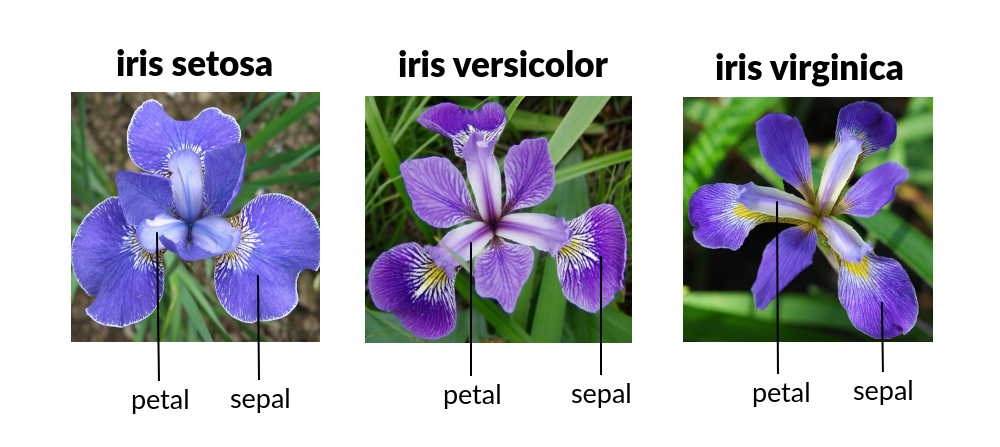

Импорт библиотек

In [28]:
import numpy as np
import pandas as pd

from pathlib import Path
from math import log2

from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Загрузка данных

In [29]:
iris = load_iris()
X = iris.data        # признаки
y = iris.target      # метки классов

In [30]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


Делим данные на train и test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Обучаем модель и делаем прогноз

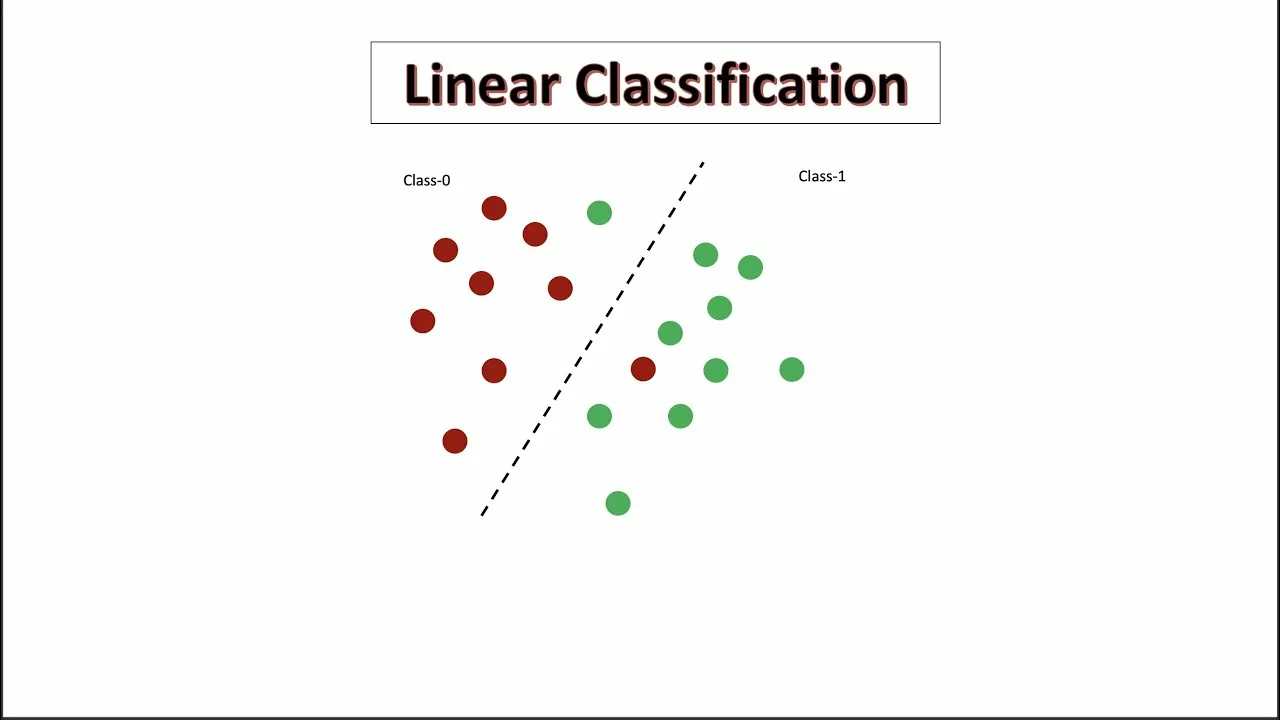

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred[:10]

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1])

In [34]:
probs = model.predict_proba(X_test)

probs[:10]

array([[9.85317118e-01, 1.46828357e-02, 4.62322265e-08],
       [1.37654815e-03, 3.90936942e-01, 6.07686509e-01],
       [1.86889921e-01, 8.08906904e-01, 4.20317527e-03],
       [1.55862011e-01, 8.39907880e-01, 4.23010948e-03],
       [9.88257472e-01, 1.17424923e-02, 3.53991130e-08],
       [4.37821743e-03, 6.88896030e-01, 3.06725753e-01],
       [9.95163124e-01, 4.83687016e-03, 5.36536935e-09],
       [9.38733755e-01, 6.12659399e-02, 3.05214544e-07],
       [1.99811710e-04, 1.71173344e-01, 8.28626845e-01],
       [1.35297039e-02, 7.35537159e-01, 2.50933137e-01]])

Оцениваем качество на отложенной выборке

In [35]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




### 2. Обнаружение DGA-доменов

Эта задача посвящена выявлению алгоритмически сгенерированных доменов второго уровня (SLD) в доменных именах. Ваша задача — построить модель машинного обучения, способную отличать легитимные домены от SLD, сгенерированных с помощью DGA.

**Цель**

Цель — обнаружение алгоритмически сгенерированных доменов второго уровня (SLD), которые часто используются вредоносным ПО для обхода механизмов обнаружения. У нас есть датасет доменных имен с метками: DGA (1) или легитимный (0). Обратите внимание, что в некоторых примерах предоставляется только SLD без домена верхнего уровня (TLD).

Поскольку ложноположительные срабатывания (когда легитимный домен ошибочно классифицируется как DGA) могут приводить к серьезным проблемам, минимизация ложноположительных ошибок важнее, чем минимизация ложноотрицательных.

In [38]:
!pip install tqdm

Скачаем тренировочный датасет по ссылке.

In [39]:
# или скачать файл train.csv с kaggle

!wget -O dga.csv "https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/f2Z4w-xHheenKg"

--2026-02-04 10:06:46--  https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/f2Z4w-xHheenKg
Resolving getfile.dokpub.com (getfile.dokpub.com)... 138.199.175.196
Connecting to getfile.dokpub.com (getfile.dokpub.com)|138.199.175.196|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloader.disk.yandex.ru/disk/397427e2f89f8191ed69dacd66c870c9c09f3e7809144a51f3e6fa41d76e8b4c/69835116/0F8ZdSEE6bEiq3zgKLsJP05XO4AC9ufyrXMW5UgtacVTptX9sWjOnpcHQpu7iCbA3x-wCfRFjW8x1tXXep-8yA%3D%3D?uid=0&filename=train_dga.csv&disposition=attachment&hash=ES%2BZaDNM863i5u9PjpBnP1sJhtbTnNSlZg%2Btb04JzVMo4tv58hzotGiOIsxkjVRPq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fcsv&owner_uid=259847718&fsize=331518539&hid=2e72185b076ef407efbf7bedfed36b5f&media_type=data&tknv=v3 [following]
--2026-02-04 10:06:46--  https://downloader.disk.yandex.ru/disk/397427e2f89f8191ed69dacd66c870c9c09f3e7809144a51f3e6fa41d76e8b4c/69835116/0F8ZdSEE6bEiq3zgKLsJP05XO4AC9ufyrXMW5

In [40]:
import numpy as np
import pandas as pd

from pathlib import Path
from math import log2

from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Посмотрим на данные

In [41]:
data = pd.read_csv("dga.csv")

data.head()

,domain,label
0,c4wfahorcxq41ps0g0u,1
1,goievinskycattederifg,1
2,ypqbo2g854e4sb7re8i2e2e,1
3,cmikleasuredehydratorysagp.com,1
4,apodoc.saarland,0


In [43]:
data.sample(10)

,domain,label
389199,cum4k.com,0
12324334,mikec,0
7009934,gardeny,0
9710678,xjdyxqztb.ws,1
10235601,autolic.ru,0
13192516,mmaboxing.ru,0
5193994,redhotpie.com,0
9659493,psymedsolutions,0
11749847,gfeehhqmdlxn,1
11954321,meisjafmjhouccv,1


Посмотрим на баланс классов

In [42]:
data['label'].value_counts(normalize=True)

,proportion
label,
0,0.555226
1,0.444774


### Feature engineering

Самая важная честь - придумать признаки, на которых мы будем решать задачу.

In [44]:
VOWELS = set("aeiou") # множество гласных букв

def shannon_entropy(s):
    probs = [s.count(c) / len(s) for c in set(s)]
    return -sum(p * log2(p) for p in probs)

def digit_ratio(name):
    length = len(name)
    digits = sum(c.isdigit() for c in name)
    return digits / max(1, length)

def letter_count(name):
    return sum(c.isalpha() for c in name)

def has_digits(name):
    return int(any(c.isdigit() for c in name))

def vowel_ratio(name):
    letters = sum(c.isalpha() for c in name)
    vowels = sum(c in VOWELS for c in name)
    return vowels / max(1, letters)

def extract_features(domain):
    name = domain.split('.')[0]

    length = len(name)                                      # длина
    digits = sum(c.isdigit() for c in name)                 # количество цифр
    has_digits_flag = digits > 0                            # есть ли цифры
    letters = sum(c.isalpha() for c in name)                # количество букв
    entropy = shannon_entropy(name) if length > 0 else 0    # энтропия
    has_dash_flag = "-" in name                             # есть ли дефис
    dash_count = name.count("-")                            # количество дефисов
    digit_ratio_value = digit_ratio(name)                   # доля цифр
    dot_count = domain.count(".")                           # количество точек
    vowel_ratio_value = vowel_ratio(name)                   # доля гласных

    return [
        length,
        digits,
        int(has_digits_flag),
        letters,
        entropy,
        int(has_dash_flag),
        dash_count,
        digit_ratio_value,
        dot_count,
        vowel_ratio_value,
    ]

Разобъем данные на train и test

In [45]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25, random_state=42)

In [46]:
len(train), len(test)

(13289842, 4429948)

In [47]:
X_train = np.array([
    extract_features(str(d))
    for d in tqdm(train["domain"], desc="Extracting train features") # прогресс-бар
])

y_train = train["label"].values

X_test = np.array([
    extract_features(str(d))
    for d in tqdm(test["domain"], desc="Extracting test features")
])

y_test = test["label"].values

Extracting test features: 100%|██████████| 4429948/4429948 [01:07<00:00, 65584.08it/s]


Перед применением модели давайте масштабируем признаки!

In [48]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression( # используем простую модель логрега
        max_iter=100,
        random_state=0
    )
)

In [49]:
model.fit(X_train, y_train) # обучаем модель

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

Оценим качество получившейся модели

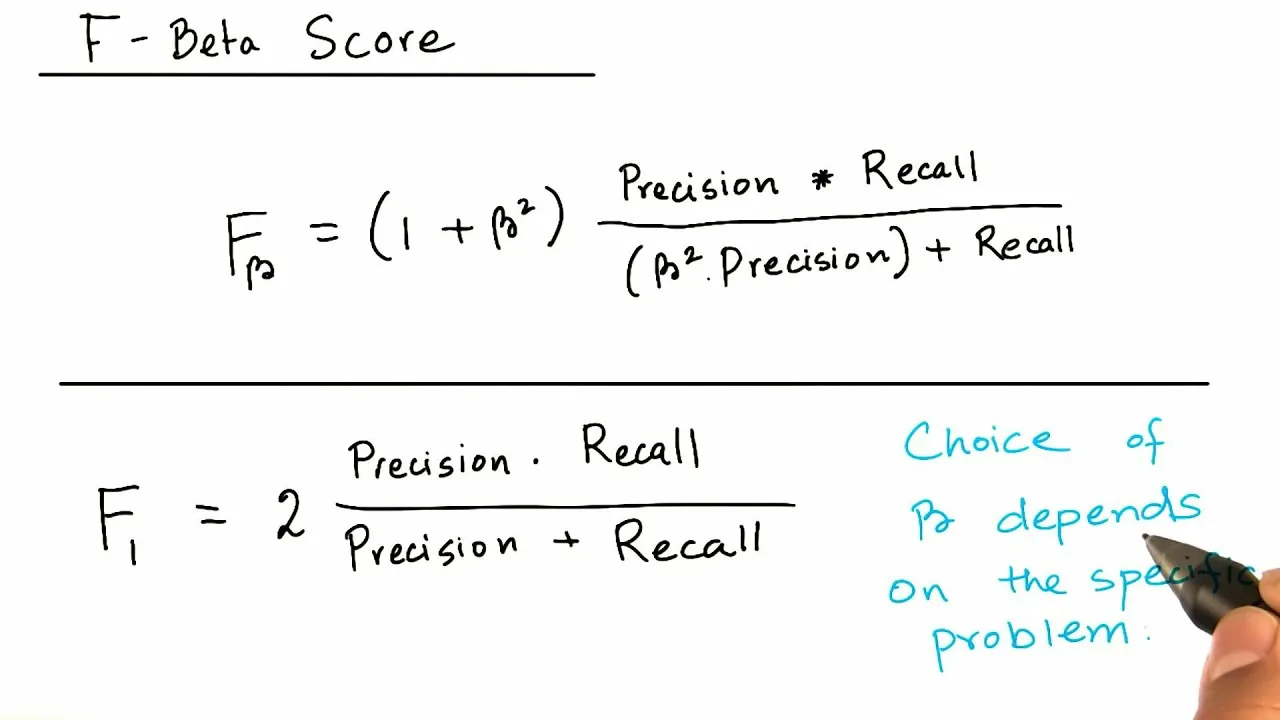

In [50]:
from sklearn.metrics import fbeta_score

y_test_pred = model.predict(X_test) # предсказываем на валидационной выборке

fbeta = fbeta_score(y_test, y_test_pred, beta=0.5) # вычисляем f_beta скор
print(fbeta)

0.7630610297993056


Давайте посмотрим и на остальные показатели, для этого есть функция classification_report

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7909    0.8286    0.8093   2458744
           1     0.7727    0.7268    0.7491   1971204

    accuracy                         0.7833   4429948
   macro avg     0.7818    0.7777    0.7792   4429948
weighted avg     0.7828    0.7833    0.7825   4429948



classification_report вывел значения **precision**, **recall**, **F1-score** и **support** для каждого класса:

- **0** — нормальные домены  
- **1** — DGA-домены  

Также выводятся:

- **accuracy** — общая доля правильных предсказаний  

- **macro avg** — среднее арифметическое метрик по классам  

- **weighted avg** — среднее метрик, взвешенное по количеству объектов каждого класса  


### Делаем прогноз на тестовой выборке и отправляем его на Kaggle

In [52]:
data_test = pd.read_csv("test.csv") # файл нужно скачать с kaggle

test_features = np.array([
    extract_features(str(d))
    for d in tqdm(data_test["domain"], desc="Extracting test features")
])

Extracting test features: 100%|██████████| 7594197/7594197 [01:59<00:00, 63739.64it/s]


In [53]:
data_test["label"] = model.predict(test_features).astype(int)

data_test[["id", "label"]].to_csv("submission.csv", index=False) # сохраняем предсказания на тестовой выборке

Далее можно загрузить файл `submission.csv` на страницу соревнования Kaggle  
[**DGA Domain Detection Challenge**](https://www.kaggle.com/t/1f9a87dd384f48449badbe4aac7bb9f1).

Kaggle автоматически оценит ваше решение на **скрытой тестовой выборке** (private leaderboard)  
и вернёт итоговый **score**, отражающий качество предсказаний по метрике соревнования.
